# Comparative study Part -2


In [1]:
import pandas as pd

import numpy as np

import missingno as msno


from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix

import warnings

warnings.filterwarnings('ignore')


In [2]:
# loading data 
data = pd.read_csv('CE802_P2_Data.csv')
test_data = pd.read_csv('CE802_P2_Test.csv')

<AxesSubplot:>

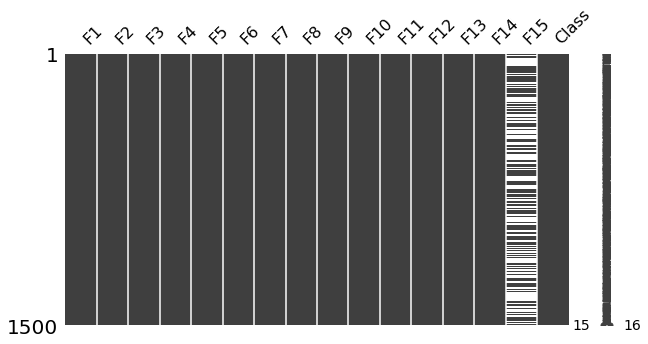

In [3]:
msno.matrix(data,figsize=(10,5))

In [4]:
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False


In [5]:
# Describing the data
data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.000000,1500.00000,1500.000000,1500.00000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000
mean,-6.638000,327.07400,-5.583260,9.93752,16.21000,3.854280,-88.098000,26.035627,0.224600,16.934107,-6.072353,-2.524933,-605.110667,-0.361213,-7.043013
std,7.159315,352.00374,2.554271,8.65042,13.51472,3.465276,120.565344,6.333818,7.635517,5.027699,1.108964,4.982472,142.833748,2.540644,1.005117
min,-24.000000,0.00000,-13.980000,0.00000,0.00000,0.000000,-431.340000,18.660000,-13.470000,7.980000,-10.310000,-11.540000,-936.220000,-5.020000,-9.400000
25%,-14.000000,45.00000,-7.480000,2.48000,3.00000,0.600000,-143.340000,20.100000,-7.140000,12.120000,-6.650000,-7.280000,-726.220000,-2.840000,-7.790000
50%,-3.000000,150.00000,-6.580000,4.14000,3.00000,1.020000,-104.340000,20.820000,3.195000,18.900000,-5.920000,-0.620000,-534.220000,0.620000,-7.050000
75%,-1.000000,585.00000,-3.087500,16.40000,30.00000,7.050000,-41.340000,31.560000,5.880000,20.820000,-5.420000,1.145000,-494.220000,1.520000,-6.322500
max,2.000000,1170.00000,-1.110000,31.40000,30.00000,10.350000,213.660000,38.960000,25.320000,32.260000,-3.710000,12.940000,-446.220000,8.670000,-4.320000


In [6]:
# Checking for null values
data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [7]:
# filling the null values with mean of the column
data["F15"].fillna(data["F15"].mean(), inplace = True)

In [8]:
# Again checking the data for null values
data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [9]:
data.isnull().values.any()

False

In [10]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000,False
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,-7.076347,False
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000,False
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,-7.076347,False
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,-7.076347,False


In [11]:
# filling the null values with mean of the column
test_data["F15"].fillna(test_data["F15"].mean(), inplace = True)

In [12]:
test_data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
F11      0
F12      0
F13      0
F14      0
F15      0
Class    0
dtype: int64

In [17]:
data.shape

(1500, 16)

In [20]:
data.dtypes

F1         int64
F2         int64
F3       float64
F4       float64
F5         int64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12      float64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

### Data Normalization

In [13]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
data1 = Scaler.fit_transform(data)
test_data_set = Scaler.fit_transform(test_data)


In [14]:
# dividing features and lables for train set
x = data1[:,:-1]
y = data1[:,15]

In [15]:
# Dividing features and lables for test set
X_test_data = test_data_set[:,:-1]
Y_test_data = test_data_set[:,15]

In [16]:
# Train Test Split for training and evaluating model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Decision Tree Classifier

In [38]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
class_DT = DecisionTreeClassifier()


In [16]:
# Parameters grid for Decision Tree Classifier
param_grids = {'max_depth': np.arange(1, 21),
             'min_samples_leaf': [1, 5, 10, 20, 50, 100]}

In [17]:
# Applying Grid Search for Decision tree
decision=GridSearchCV(class_DT,param_grids, cv=StratifiedKFold(n_splits=10))
# Fitting the Model

decision.fit(X_train,Y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'min_samples_leaf': [1, 5, 10, 20, 50, 100]})

In [1]:
# Best parameters from grid search
decision.best_params_

NameError: name 'decision' is not defined

In [40]:
# Fitting Decision tree classifier for best parameters after grid search
decision_tree_classifier = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 5)

decision_tree_classifier.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=5)

In [41]:
# Accuracy for the Decision Tree classifier
accuracy = accuracy_score(Y_test,decision_tree_classifier.predict(X_test))*100
print('Accuracy of Decision Tree Classifier is :  ', accuracy)

Accuracy of Decision Tree Classifier is :   77.33333333333333


In [21]:
# Confusion Matrix For Predictions in Decision Tree classifier
print(confusion_matrix(Y_test, decision_tree_classifier.predict(X_test)))
# Classification Report for predictions in Decision Tree
print(classification_report(Y_test,decision_tree_classifier.predict(X_test) ))

[[194  56]
 [ 46 154]]
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79       250
         1.0       0.73      0.77      0.75       200

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.78      0.77      0.77       450



### K- Nearest Neighbors

In [43]:
# K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

Text(0, 0.5, 'Error Rate')

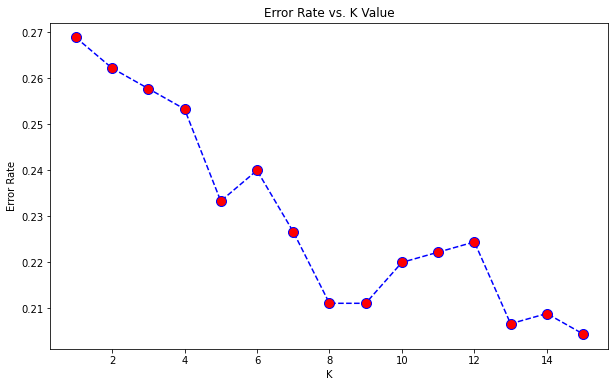

In [23]:
error_rate = [] 
  
# for best k value 
for i in range(1, 16): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train) 
    pred_i = knn.predict(X_test) 
    error_rate.append(np.mean(pred_i != Y_test)) 
# plotting error against k value  
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 16), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate') 

In [44]:
# Fitting model for best k 
knn = KNeighborsClassifier(n_neighbors = 15) 
knn.fit(X_train, Y_train) 


KNeighborsClassifier(n_neighbors=15)

In [75]:
# predicting train set
Train_Prediction_knn = knn.predict(X_train)
# training accuracy 
print('Training accuracy for  KNN :',accuracy_score(Y_train,Train_Prediction_knn)*100)

Training accuracy for  KNN 82.95238095238095


In [46]:
# Training evaluation for KNN
print(confusion_matrix(Y_train,Train_Prediction_knn ))
# Classification report for training in KNN
print(classification_report(Y_train,Train_Prediction_knn))

[[494  65]
 [114 377]]
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85       559
         1.0       0.85      0.77      0.81       491

    accuracy                           0.83      1050
   macro avg       0.83      0.83      0.83      1050
weighted avg       0.83      0.83      0.83      1050



In [106]:
# predicting from evaluation set in KNN
pred_y_knn = knn.predict(X_test)
# Accuracy Score from evaluation set in KNN
print('Accuracy Score for evaluation in KNN ',accuracy_score(Y_test,pred_y_knn)*100)

Accuracy Score for evaluation in KNN  79.55555555555556


In [25]:
# Confusion Matrix for evaluation in KNN
print(confusion_matrix(Y_test, pred_y_knn))
# Classification  report for evaluation in KNN
print(classification_report(Y_test, pred_y_knn))

[[200  50]
 [ 42 158]]
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       250
         1.0       0.76      0.79      0.77       200

    accuracy                           0.80       450
   macro avg       0.79      0.80      0.79       450
weighted avg       0.80      0.80      0.80       450



### Logistic Regression

In [49]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [70]:
# Hyper parameters for grid search
grid={"C":[1,10,100],
      "penalty":["l1","l2"]}# l1 lasso l2 ridge

In [71]:
# implementing grid search for Ligistic Regression model
grid_search=GridSearchCV(LogisticRegression(),
                         grid,
                         cv=StratifiedKFold(n_splits=10))

# Fitting train data to best estimator
grid_search.fit(X_train,Y_train)



tuned hpyerparameters :(best parameters)  {'C': 100, 'penalty': 'l2'}


In [108]:
# Priting best parametrs found in Gridsearch
print("tuned hyperparameters :(best parameters) ",grid_search.best_params_)

tuned hyperparameters :(best parameters)  {'C': 100, 'penalty': 'l2'}


In [76]:
# Fitting Logistic Regression Model for best parameters
Logistic_regression_model = LogisticRegression(C = 100, penalty = 'l2' )
Logistic_regression_model.fit(X_train,Y_train)

LogisticRegression(C=100)

In [78]:
# Training Accuracy for Logistic Regression
Train_evaluation_logistic = Logistic_regression_model.predict(X_train)
accuracy_score(Y_train,Train_evaluation_logistic)

0.8742857142857143

In [54]:
# Predicting values from evaluation set
Logistic_prediction = Logistic_regression_model.predict(X_test)

In [56]:
# Testing accuracy of evaluation set in Logistic regression
accuracy_score(Y_test,Logistic_prediction )*100

88.66666666666667

In [79]:
# Confusion matrix and classification report for Logistic Regression
print(confusion_matrix(Y_test,Logistic_prediction ))
print(classification_report(Y_test, Logistic_prediction))

[[220  30]
 [ 21 179]]
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.90       250
         1.0       0.86      0.90      0.88       200

    accuracy                           0.89       450
   macro avg       0.88      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



### Support Vector Machine

In [111]:
from sklearn.svm import SVC

In [112]:
# Defining a model
SVModel = SVC(random_state = 0)

In [113]:
# Parameters Grid for hyper parameter tuining
parm = {'kernel':('linear','poly','rbf','sigmoid'),
       'C':[1,52,10],
       'degree':[3,8],
       'coef0':[0.001,10,0.5],
       'gamma':('auto','scale')}

In [114]:
# Grid Search for best parameters in SVM
Grids = GridSearchCV(SVModel, parm,  cv=StratifiedKFold(n_splits= 7))
Grids.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=SVC(random_state=0),
             param_grid={'C': [1, 52, 10], 'coef0': [0.001, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [115]:
# Best parameters and best score from grid search
Grids.best_params_
Grids.best_score_

0.8942857142857142

In [118]:
# Fitting model for best hyper parabeters
SVModel_classification = SVC(C= 52, coef0 = 0.001, degree =  3, gamma = 'scale', kernel = 'rbf')
SVModel_classification.fit(X_train,Y_train)

SVC(C=52, coef0=0.001)

In [116]:
train_Prediction = SVModel_classification.predict(X_train)
train_acc = accuracy_score(Y_train, train_Prediction)
print('Training Accuracy : ', train_acc)

In [32]:
# predictions for evaluation set in SVM
SVC_presictions = SVModel_classification.predict(X_test)

In [107]:
# Accuracy Score for evaluation in SVM
print("Accuracy for SVM ",accuracy_score(Y_test,SVC_presictions )*100)

Accuracy for SVM  90.44444444444444


In [34]:
# Classification report and confusion matrix for evaluation in SVM 
print(confusion_matrix(Y_test,SVC_presictions ))
print(classification_report(Y_test, SVC_presictions))

[[228  22]
 [ 21 179]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       250
         1.0       0.89      0.90      0.89       200

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



### Prediction on a hold out Test Set Values from the best model

In [35]:
# Predicting Test Class from SVM Model
SVC_presictions_deployment = SVModel_classification.predict(X_test_data)

In [36]:
# Model Predictions
SVC_presictions_deployment

array([0., 0., 0., ..., 0., 1., 0.])

In [91]:
# Conversting the predictions into Series
Predictions_deployment = pd.Series(SVC_presictions_deployment)

In [92]:
# Mapping Predictions
Predictions_deployment = Predictions_deployment.map({0:False,1:True})

In [97]:
# Filling the Null values in the  Class column with predictions
test_data["Class"] = Predictions_deployment

In [102]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-4,765,-3.72,26.40,30,5.15,18.66,31.06,-4.80,15.18,-5.05,-6.56,-766.22,-1.98,-4.670000,False
1,-3,3,-7.10,1.20,3,0.36,-119.34,20.00,6.39,19.92,-5.29,0.32,-524.22,2.12,-7.076347,False
2,-4,735,-1.70,14.50,30,6.50,183.66,37.36,-11.88,11.22,-7.79,-9.64,-776.22,-3.88,-6.570000,False
3,-14,90,-2.55,13.30,30,7.95,-236.34,32.06,-3.09,15.86,-4.33,-8.76,-916.22,-3.41,-7.076347,False
4,-1,174,-7.63,3.74,3,0.94,-143.34,19.58,11.67,19.62,-7.63,1.12,-506.22,3.08,-7.076347,False


In [103]:
# Adding data to CSV file
test_data.to_csv('CE802_P2_Test.csv', index = False)